<a href="https://colab.research.google.com/github/Erick-Alen/img_processing-Cars_vs_Trucks/blob/master/Cars_vs_Trucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob, os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential, Model, save_model, load_model
from keras.layers import Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_dir="./train"
validation_dir="./valid"
epochs=100
batch_size = 256

In [ ]:
# Generate data and labels with data augmentation
train_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
    )

valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    classes=['Car', 'Truck'],
    class_mode='binary',
    shuffle=True
    )

valid_generator=valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    classes=['Car', 'Truck'],
    class_mode='binary',
    shuffle=False
    )

Found 5117 images belonging to 2 classes.
Found 5061 images belonging to 2 classes.


In [ ]:
#Build AlexNet Model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Passing it to a Fully Connected layer
#model.add(Flatten())
model.add(GlobalAveragePooling2D())
# 1st Fully Connected Layer
model.add(Dense(512))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 96)        34944     
                                                                 
 activation_7 (Activation)   (None, 30, 30, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 activation_8 (Activation)   (None, 14, 14, 256)      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

# checkpoints
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/Modelo/modelV3.hdf5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1)

# Stop when we stop learning
early = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    # workers=8,
    callbacks=[checkpoint, early])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.7369 - accuracy: 0.5665
Epoch 1: val_accuracy improved from 0.42857 to 0.50267, saving model to /content/drive/MyDrive/Colab Notebooks/Modelo/modelV3.hdf5
20/20 [==============================] - 51s 3s/step - loss: 0.7369 - accuracy: 0.5665 - val_loss: 1.1281 - val_accuracy: 0.5027
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.7025 - accuracy: 0.5998
Epoch 2: val_accuracy improved from 0.50267 to 0.59257, saving model to /content/drive/MyDrive/Colab Notebooks/Modelo/modelV3.hdf5
20/20 [==============================] - 51s 3s/step - loss: 0.7025 - accuracy: 0.5998 - val_loss: 0.8295 - val_accuracy: 0.5926
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.6242
Epoch 3: val_accuracy improved from 0.59257 to 0.59593, saving model to /content/drive/MyDrive/Colab Notebooks/Modelo/modelV3.hdf5
20/20 [==============================] - 52s 3s/step - loss: 0.6

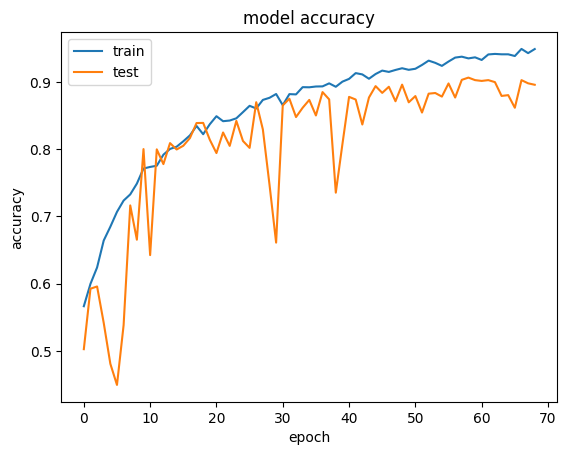

In [ ]:
# Plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

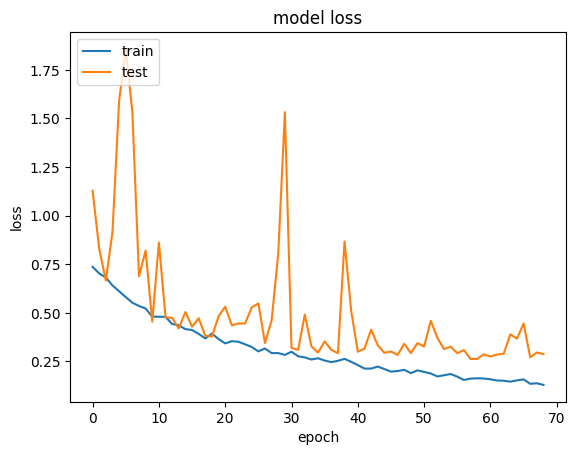

In [ ]:
# Plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
result = model.evaluate(valid_generator)
print('Test Loss: ', result[0])
print('Test Accuracy: ', result[1])

20/20 [==============================] - 13s 668ms/step - loss: 0.2631 - accuracy: 0.9065
Test Loss:  0.26308271288871765
Test Accuracy:  0.9065402150154114


In [ ]:
# Confution Matrix and Classification Report
y_true = valid_generator.classes

Y_pred = model.predict(valid_generator, verbose=1)
y_pred = Y_pred > 0.5
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

20/20 [==============================] - 14s 676ms/step
Confusion Matrix
[[2679  243]
 [ 230 1909]]


In [ ]:
print('Classification Report')
target_names = ['Car', 'Truck']
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

         Car       0.92      0.92      0.92      2922
       Truck       0.89      0.89      0.89      2139

    accuracy                           0.91      5061
   macro avg       0.90      0.90      0.90      5061
weighted avg       0.91      0.91      0.91      5061

